# Phase 6.1

### Import the packages

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as pyplot
import string
import cv2
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
dim = 500

## Function to read the dataset

### Verifying the model on the mobile captured Images

##### Here we have taken 784 training images of both red tomatoes and green tomatoes. But we have increased the testing images from 100 to 200. So train-test dataset ratio is 80:20.  

In [3]:
def getTomatoes(tomatoes, data_type, print_n=False, k_fold=False):
    images = []
    labels = []
    val = ['Mobile_captured_training_tomatoes', 'Mobile_captured_test_tomatoes']
    if not k_fold:
        path = "/home/ai-ml/Downloads/" + data_type + "/"
        for i,f in enumerate(tomatoes):
            p = path + f
            j=0
            for image_path in glob.glob(os.path.join(p, "*.jpg")):
                image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                image = cv2.resize(image, (dim, dim))
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                images.append(image)
                labels.append(i)
                j+=1
            if(print_n):
                print("There are " , j , " " , data_type, " images of " , tomatoes[i])
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    else:
        for v in val:
            path = "/home/ai-ml/Downloads/" + v + "/"
            for i,f in enumerate(tomatoes):
                p = path + f
                j=0
                for image_path in glob.glob(os.path.join(p, "*.jpg")):
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    image = cv2.resize(image, (dim, dim))
                    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                    images.append(image)
                    labels.append(i)
                    j+=1
        images = np.array(images)
        labels = np.array(labels)
        return images, labels
    
def getAllTomatoes():
    tomatoes = []
    for tomato_path in glob.glob("/home/ai-ml/Downloads/*"):
        tomato = tomato_path.split("/")[-1]
        tomatoes.append(tomato)
    return tomatoes

## Function to plot the images

In [4]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(20,20)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axes = pyplot.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axes[i, j].axis('off')
            axes[i, j].imshow(images[n])
            n += 1   

In [5]:
tomatoes=['Mobile_captured_green_tomatoes','Mobile_captured_red_tomatoes']
print(tomatoes)
X_train, y_train =  getTomatoes(tomatoes, 'Mobile_captured_training_tomatoes', print_n=True, k_fold=False)
X_test, y_test = getTomatoes(tomatoes, 'Mobile_captured_test_tomatoes', print_n=True, k_fold=False)

['Mobile_captured_green_tomatoes', 'Mobile_captured_red_tomatoes']
There are  784   Mobile_captured_training_tomatoes  images of  Mobile_captured_green_tomatoes
There are  784   Mobile_captured_training_tomatoes  images of  Mobile_captured_red_tomatoes
There are  200   Mobile_captured_test_tomatoes  images of  Mobile_captured_green_tomatoes
There are  200   Mobile_captured_test_tomatoes  images of  Mobile_captured_red_tomatoes


In [6]:
X,y = getTomatoes(tomatoes, '', print_n=True, k_fold=True)
print("X = ",X)
print("y = ",y)

X =  [[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [25

In [7]:
scaler = StandardScaler()
X_train1 = scaler.fit_transform([i.flatten() for i in X_train])
X_test = scaler.fit_transform([i.flatten() for i in X_test])
X = scaler.fit_transform([i.flatten() for i in X])
print("X = ",X)

X =  [[ 0.3321112   0.32885395  0.33093974 ...  0.3249932   0.32558029
   0.32530845]
 [ 0.3321112   0.32885395  0.33093974 ...  0.3249932   0.32558029
   0.32530845]
 [ 0.3321112   0.32885395  0.33093974 ...  0.3249932   0.32558029
   0.32530845]
 ...
 [ 0.3321112   0.32885395  0.33093974 ...  0.3249932   0.32558029
   0.32530845]
 [ 0.3321112   0.32885395  0.33093974 ...  0.3249932   0.32558029
   0.32530845]
 [-2.12472363 -2.44763501 -2.69536718 ... -2.71708054 -2.55565321
  -2.66442948]]


Mobile_captured_green_tomatoes


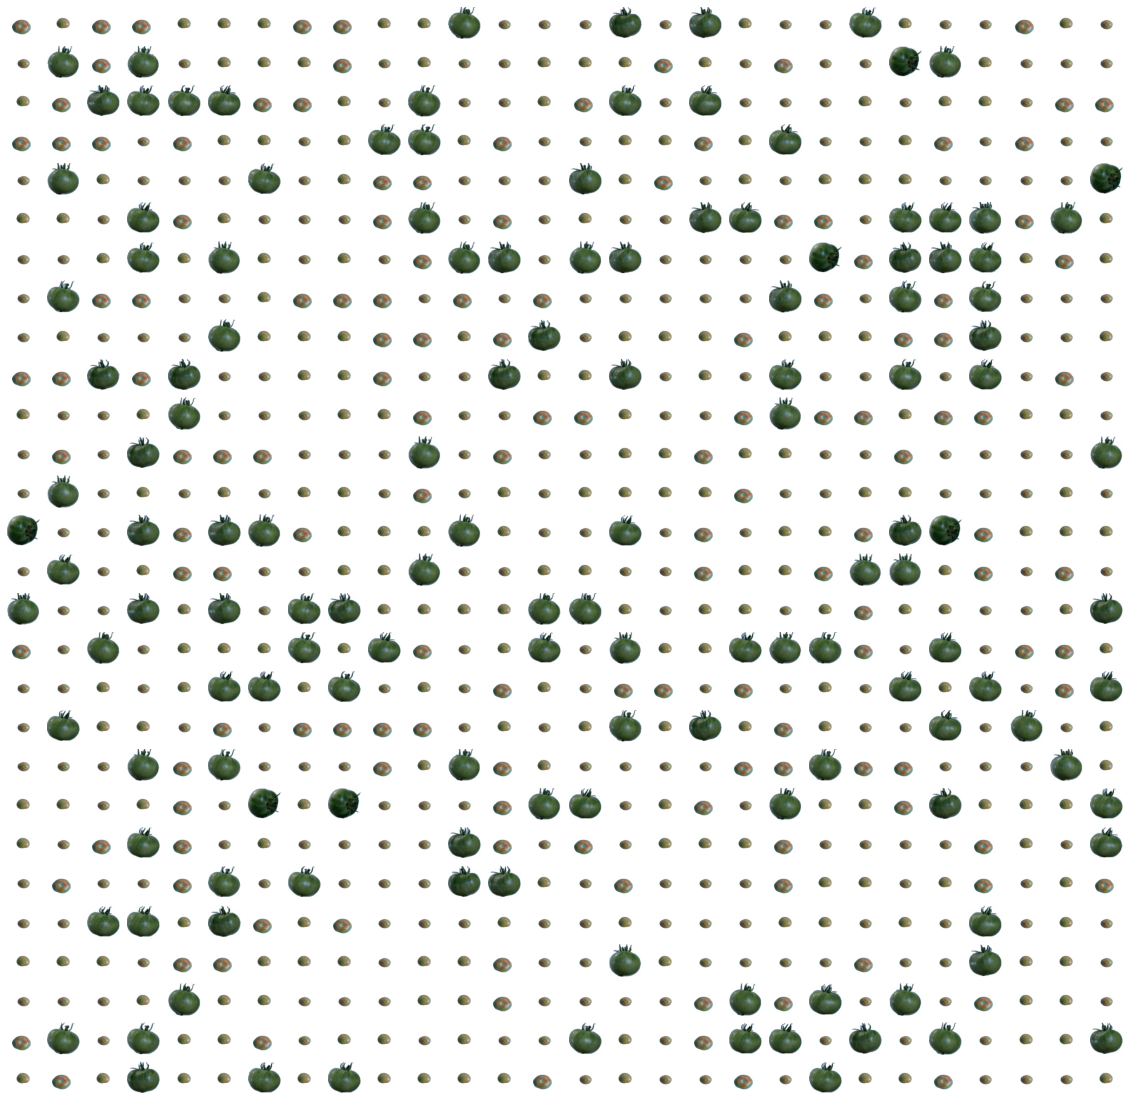

In [8]:
print(tomatoes[y_train[0]])
plot_image_grid(X_train[0:784], 28, 28)

Mobile_captured_red_tomatoes


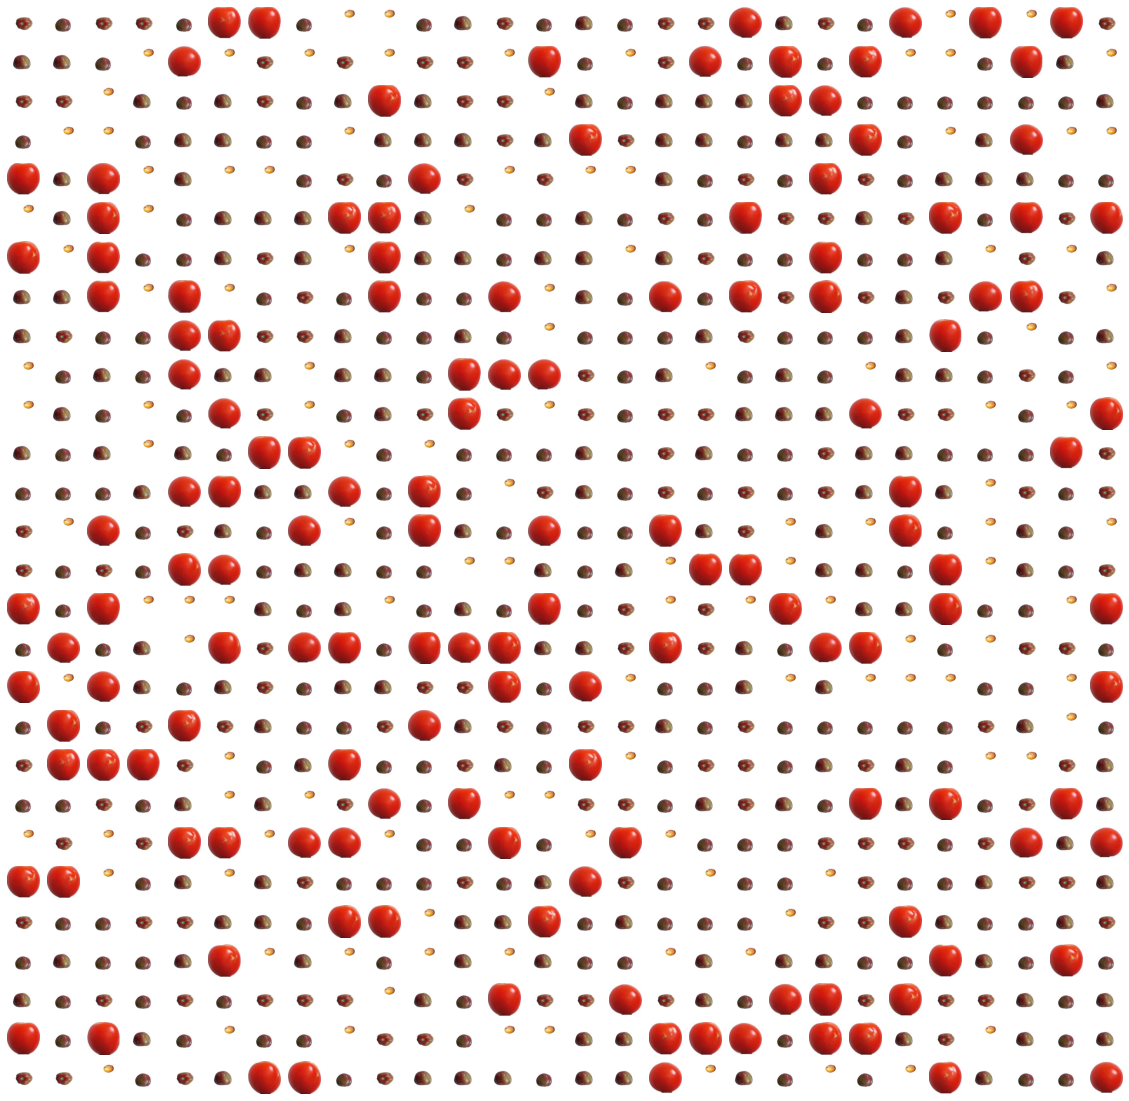

In [9]:
print(tomatoes[y_train[784]])
plot_image_grid(X_train[784:1568], 28, 28)

In [10]:
tomatoes = ['Mobile_captured_green_tomatoes','Mobile_captured_red_tomatoes']

#Get Images and Labels
X, y =  getTomatoes(tomatoes, 'Mobile_captured_training_tomatoes')
X_test, y_test = getTomatoes(tomatoes, 'Mobile_captured_test_tomatoes')

#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

## SVM for classification on mobile captured trained data of tomatoes

### 1. Linear SVM

In [11]:
# Linear SVM
model = SVC(C=1,degree=1,random_state=0,gamma='auto',kernel='linear',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Linear SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Linear SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Linear SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Linear SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
Accuracy with Linear SVM = 78.2%
Precision with Linear SVM = 78.5%
Recall with Linear SVM = 78.2%
F1_score with Linear SVM = 78.3%


col_0,0,1
row_0,,
0,149,36
1,51,164


#### Checking for ROC Curves and Precision-Recall Curve

In [12]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Linear SVM: precision = ",svm_precision)
print("Linear SVM: recall = ",svm_recall)

Linear SVM: precision =  [0.55710306 0.55462185 0.55774648 0.56090652 0.65346535 0.65780731
 0.66442953 0.67346939 0.67808219 0.6875     0.69473684 0.69964664
 0.6975089  0.70250896 0.69708029 0.70740741 0.71268657 0.72348485
 0.72900763 0.72692308 0.73255814 0.74409449 0.75       0.76209677
 0.77459016 0.77272727 0.76793249 0.76595745 0.7639485  0.76190476
 0.76855895 0.76651982 0.76444444 0.76233184 0.760181   0.76712329
 0.76497696 0.7627907  0.76995305 0.76777251 0.76555024 0.75980392
 0.75742574 0.755      0.75252525 0.75       0.74742268 0.74479167
 0.74210526 0.7393617  0.73655914 0.74456522 0.75274725 0.75
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
Linear SVM: recall =  [1. 

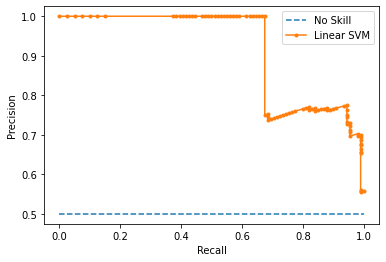

In [13]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Linear SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [14]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Linear SVM : ROC AUC =',svm_auc)

No Skill: ROC AUC = 0.5
Linear SVM : ROC AUC = 0.9049750000000001


In [15]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('linear_svm_fpr =',svm_fpr)
print('linear_svm_tpr =',svm_tpr)

ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
linear_svm_fpr = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.225 0.225 0.245
 0.245 0.245 0.245 0.255 0.255 0.265 0.265 0.275 0.275 0.275 0.275 0.315
 0.325 0.345 0.355 0.355 0.365 0.385 0.395 0.415 0.415 0.425 0.425 0.435
 0.45  0.47  0.48  0.5   0.515 0.525 0.775 0.795 0.795 0.825 0.905 0.915
 0.955 0.975 1.   ]
linear_svm_tpr = [0.    0.025 0.15  0.375 0.445 0.47  0.59  0.615 0.675 0.675 0.685 0.685
 0.775 0.8   0.82  0.82  0.84  0.84  0.88  0.88  0.91  0.935 0.945 0.945
 0.945 0.945 0.945 0.955 0.955 0.955 0.955 0.955 0.98  0.98  0.99  0.99
 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  1.    1.    1.    1.
 1.    1.    1.   ]


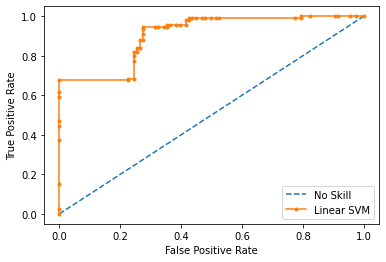

In [16]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Linear SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### 2. RBF SVM

In [17]:
# Kernel RBF SVM
model = SVC(C=1,degree=1,random_state=0,gamma='auto',kernel='rbf',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Kernel RBF SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Kernel RBF SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Kernel RBF SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Kernel RBF SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Accuracy with Kernel RBF SVM = 66.0%
Precision with Kernel RBF SVM = 78.0%
Recall with Kernel RBF SVM = 66.0%
F1_score with Kernel RBF SVM = 68.2%


col_0,0,1
row_0,,
0,83,19
1,117,181


#### Checking for ROC Curves and Precision-Recall Curve

In [18]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("RBF SVM: precision = ",svm_precision)
print("RBF SVM: recall = ",svm_recall)

RBF SVM: precision =  [0.50632911 0.5        0.57352941 0.57692308 0.57057057 0.56797583
 0.57492355 0.56832298 0.571875   0.57911392 0.58280255 0.59032258
 0.58766234 0.59539474 0.59933775 0.60738255 0.61148649 0.61986301
 0.62413793 0.62152778 0.61888112 0.6254417  0.62989324 0.62318841
 0.63235294 0.63703704 0.64419476 0.6490566  0.64638783 0.651341
 0.6614786  0.66666667 0.67729084 0.6746988  0.68016194 0.67755102
 0.67489712 0.68619247 0.6835443  0.68085106 0.68669528 0.69264069
 0.70484581 0.6981982  0.70454545 0.71100917 0.70833333 0.72169811
 0.71904762 0.71634615 0.71359223 0.72058824 0.71782178 0.715
 0.71212121 0.70918367 0.72395833 0.72105263 0.71808511 0.71505376
 0.71195652 0.71978022 0.71666667 0.71348315 0.71022727 0.70689655
 0.70348837 0.7        0.69642857 0.69277108 0.68902439 0.68518519
 0.68125    0.68987342 0.68589744 0.68181818 0.67763158 0.67333333
 0.96190476 0.96116505 0.96039604 0.95959596 0.95744681 0.95652174
 0.95555556 0.95454545 0.95348837 0.95238095 0.

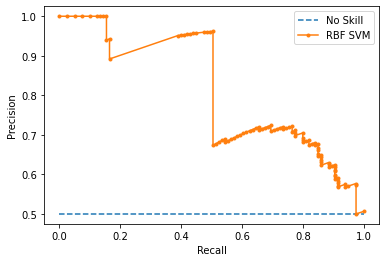

In [19]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [20]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('RBF SVM : ROC AUC =',svm_auc)

No Skill: ROC AUC = 0.5
RBF SVM : ROC AUC = 0.7917500000000001


In [21]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('rbf_svm_fpr =',svm_fpr)
print('rbf_svm_tpr =',svm_tpr)

ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
rbf_svm_fpr = [0.    0.    0.    0.    0.01  0.01  0.02  0.02  0.02  0.02  0.02  0.245
 0.245 0.255 0.255 0.265 0.265 0.285 0.285 0.295 0.295 0.315 0.315 0.335
 0.335 0.355 0.375 0.375 0.395 0.395 0.405 0.405 0.425 0.435 0.455 0.465
 0.465 0.475 0.49  0.5   0.52  0.52  0.53  0.545 0.545 0.555 0.575 0.585
 0.605 0.615 0.635 0.635 0.655 0.665 0.685 0.695 0.695 0.715 0.715 0.715
 0.725 0.975 0.975 1.   ]
rbf_svm_tpr = [0.    0.025 0.125 0.155 0.155 0.165 0.165 0.39  0.45  0.475 0.505 0.505
 0.545 0.545 0.655 0.655 0.695 0.695 0.735 0.735 0.765 0.765 0.775 0.775
 0.8   0.8   0.8   0.82  0.82  0.84  0.84  0.85  0.85  0.85  0.85  0.85
 0.86  0.86  0.86  0.86  0.86  0.885 0.885 0.885 0.905 0.905 0.905 0.905
 0.905 0.905 0.905 0.915 0.915 0.915 0.915 0.915 0.94  0.94  0.95  0.975
 0.975 0.975 1.    1.   ]


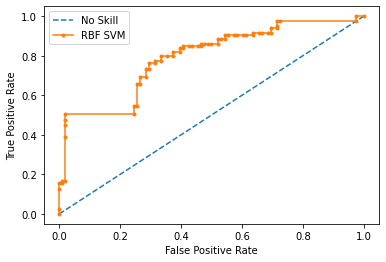

In [22]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='RBF SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### 3. Poly SVM

In [23]:
# Poly SVM
model = SVC(C=1,degree=1,random_state=0,gamma='auto',kernel='poly',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Poly SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Poly SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Poly SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Poly SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0]
Accuracy with Poly SVM = 78.2%
Precision with Poly SVM = 78.5%
Recall with Poly SVM = 78.2%
F1_score with Poly SVM = 78.3%


col_0,0,1
row_0,,
0,149,36
1,51,164


#### Checking for ROC Curves and Precision-Recall Curve

In [24]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Poly SVM: precision = ",svm_precision)
print("Poly SVM: recall = ",svm_recall)

Poly SVM: precision =  [0.55710306 0.55462185 0.55774648 0.56090652 0.65346535 0.65780731
 0.66442953 0.67346939 0.67808219 0.6875     0.69473684 0.69964664
 0.6975089  0.70250896 0.69708029 0.70740741 0.71268657 0.72348485
 0.72900763 0.72692308 0.73255814 0.74409449 0.75       0.76209677
 0.77459016 0.77272727 0.76793249 0.76595745 0.7639485  0.76190476
 0.76855895 0.76651982 0.76444444 0.76233184 0.760181   0.76712329
 0.76497696 0.7627907  0.76995305 0.76777251 0.76555024 0.75980392
 0.75742574 0.755      0.75252525 0.75       0.74742268 0.74479167
 0.74210526 0.7393617  0.73655914 0.74456522 0.75274725 0.75
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]
Poly SVM: recall =  [1.    0

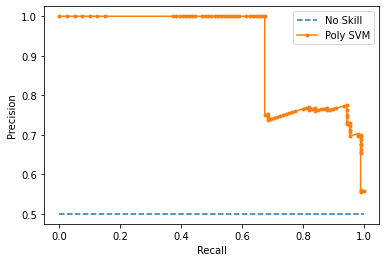

In [25]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Poly SVM : ROC AUC =',svm_auc)

No Skill: ROC AUC = 0.5
Poly SVM : ROC AUC = 0.9049750000000001


In [27]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('poly_svm_fpr =',svm_fpr)
print('poly_svm_tpr =',svm_tpr)

ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
poly_svm_fpr = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.225 0.225 0.245
 0.245 0.245 0.245 0.255 0.255 0.265 0.265 0.275 0.275 0.275 0.275 0.315
 0.325 0.345 0.355 0.355 0.365 0.385 0.395 0.415 0.415 0.425 0.425 0.435
 0.45  0.47  0.48  0.5   0.515 0.525 0.775 0.795 0.795 0.825 0.905 0.915
 0.955 0.975 1.   ]
poly_svm_tpr = [0.    0.025 0.15  0.375 0.445 0.47  0.59  0.615 0.675 0.675 0.685 0.685
 0.775 0.8   0.82  0.82  0.84  0.84  0.88  0.88  0.91  0.935 0.945 0.945
 0.945 0.945 0.945 0.955 0.955 0.955 0.955 0.955 0.98  0.98  0.99  0.99
 0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.99  1.    1.    1.    1.
 1.    1.    1.   ]


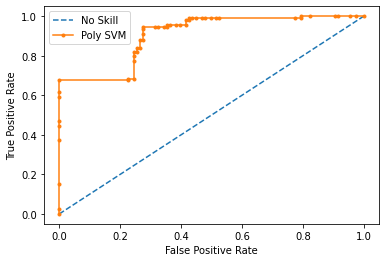

In [28]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Poly SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### 4. Sigmoid SVM

In [29]:
# Sigmoid SVM
model = SVC(C=1,degree=1,random_state=0,gamma='auto',kernel='sigmoid',probability=True)
model.fit(X_train, y) 
y_predict = model.predict(X_test)
print("Y_Predict =",y_predict)
accuracy = metrics.accuracy_score(y_predict, y_test) * 100
print("Accuracy with Sigmoid SVM = {0:.1f}%".format(accuracy))
precision = metrics.precision_score(y_predict, y_test,average='weighted') * 100
print("Precision with Sigmoid SVM = {0:.1f}%".format(precision))
recall = metrics.recall_score(y_predict, y_test,average='weighted') * 100
print("Recall with Sigmoid SVM = {0:.1f}%".format(recall))
f1_score = metrics.f1_score(y_predict, y_test,average='weighted') * 100
print("F1_score with Sigmoid SVM = {0:.1f}%".format(f1_score))
pd.crosstab(y_predict,y_test)

Y_Predict = [0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0
 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy with Sigmoid SVM = 73.8%
Precision with Sigmoid SVM = 85.0%
Recall with Sigmoid SVM = 73.8%
F1_score with Sigmoid SVM = 75.3%


col_0,0,1
row_0,,
0,100,5
1,100,195


#### Checking for ROC Curves and Precision-Recall Curve

In [30]:
## Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
svm_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:, 1]
y_predict=model.predict(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_probs)
# summarize scores
print("Sigmoid SVM: precision = ",svm_precision)
print("Sigmoid SVM: recall = ",svm_recall)

Sigmoid SVM: precision =  [0.5        0.49367089 0.5        0.56521739 0.66101695 0.65517241
 0.64912281 0.58333333 0.57446809 0.56521739 0.55555556 0.56053812
 0.55045872 0.5462963  0.53554502 0.54066986 0.52941176 0.51758794
 0.50515464 0.5        0.50526316 0.51612903 0.51086957 0.52222222
 0.51685393 0.51136364 0.50574713 0.51764706 0.53012048 0.54320988
 0.55       0.56050955 0.55483871 0.5620915  0.55629139 0.56375839
 1.        ]
Sigmoid SVM: recall =  [1.    0.975 0.975 0.975 0.975 0.95  0.925 0.7   0.675 0.65  0.625 0.625
 0.6   0.59  0.565 0.565 0.54  0.515 0.49  0.48  0.48  0.48  0.47  0.47
 0.46  0.45  0.44  0.44  0.44  0.44  0.44  0.44  0.43  0.43  0.42  0.42
 0.   ]


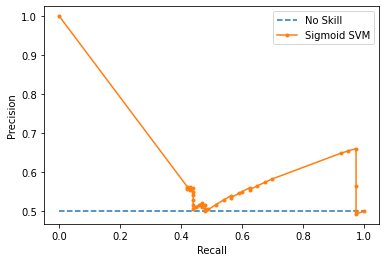

In [31]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [32]:
# ROC AUC Curve
from sklearn.metrics import roc_curve,roc_auc_score
ns_probs = [0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test,ns_probs)
svm_auc=roc_auc_score(y_test,svm_probs)
print('No Skill: ROC AUC =' ,ns_auc)
print('Sigmoid SVM : ROC AUC =',svm_auc)

No Skill: ROC AUC = 0.5
Sigmoid SVM : ROC AUC = 0.6373500000000001


In [33]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
print('ns_fpr =',ns_fpr)
print('ns_tpr =',ns_tpr)
print('sigmoid_svm_fpr =',svm_fpr)
print('sigmoid_svm_tpr =',svm_tpr)

ns_fpr = [0. 1.]
ns_tpr = [0. 1.]
sigmoid_svm_fpr = [0.    0.325 0.335 0.335 0.345 0.345 0.36  0.37  0.43  0.43  0.45  0.45
 0.47  0.48  0.48  0.48  0.49  0.49  0.49  0.49  0.5   0.5   0.5   0.5
 0.75  0.975 1.    1.   ]
sigmoid_svm_tpr = [0.    0.42  0.42  0.43  0.43  0.44  0.44  0.44  0.44  0.47  0.47  0.48
 0.48  0.48  0.49  0.565 0.565 0.59  0.6   0.625 0.625 0.7   0.925 0.975
 0.975 0.975 0.975 1.   ]


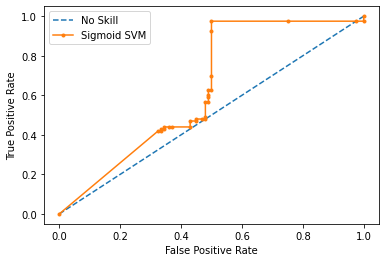

In [34]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='Sigmoid SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()